<a href="https://colab.research.google.com/github/yudits10/UAS_1_EDA/blob/main/UAS_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler #Library umum untuk machine learning
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('creditapproval.csv')

In [3]:
df_train.columns

Index(['nama_nasabah', 'jenis_kelamin', 'umur', 'jml_pinjaman', 'jkw',
       'jml_angsuran_per_bulan', 'type_pinjaman', 'jenis_pinjaman',
       'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', 'bi_gol_penjamin',
       'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga',
       'status kredit'],
      dtype='object')

In [4]:
df_train.head(10)

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,37.0,649926.0,6,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,x4,P,2.0,459168.0,12,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,x5,P,34.0,3055499.0,8,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
5,x6,L,49.0,2000000.0,16,0.00,100,301,6000.0,1,874,875,-85000.0,0.00,0.0,LANCAR
6,x7,L,31.0,8333334.0,10,833333.40,100,301,6000.0,1,874,875,8333334.0,3333333.60,0.0,MACET
7,x8,L,27.0,4435001.0,8,671098.00,100,301,6000.0,1,874,875,4435001.0,0.00,0.0,LANCAR
8,x9,L,42.0,560000.0,8,95221.00,100,301,6000.0,1,874,875,660800.0,100800.00,0.0,MACET
9,x10,L,49.0,1443750.0,15,107800.00,100,301,6000.0,1,874,875,1617000.0,1078000.00,0.0,MACET


In [5]:
df_train['jml_pinjaman'].describe()

count    8.660000e+02
mean     2.677856e+06
std      9.585890e+06
min      8.333333e+04
25%      8.968875e+05
50%      1.451667e+06
75%      2.000000e+06
max      2.286550e+08
Name: jml_pinjaman, dtype: float64

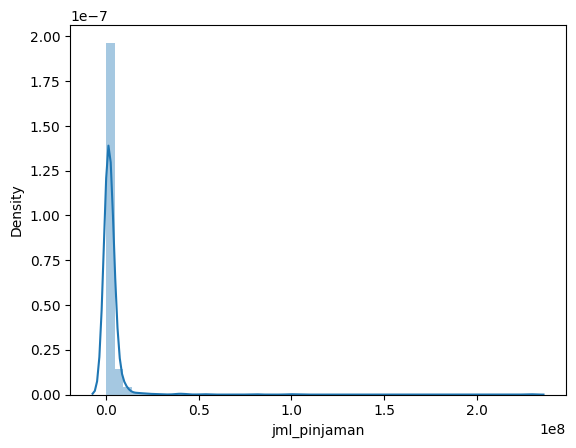

In [6]:
sns.distplot(df_train['jml_pinjaman']);

In [7]:
print("Skewness: %f" % df_train['jml_pinjaman'].skew())
print("Kurtosis: %f" % df_train['jml_pinjaman'].kurt())

Skewness: 17.459959
Kurtosis: 375.698673


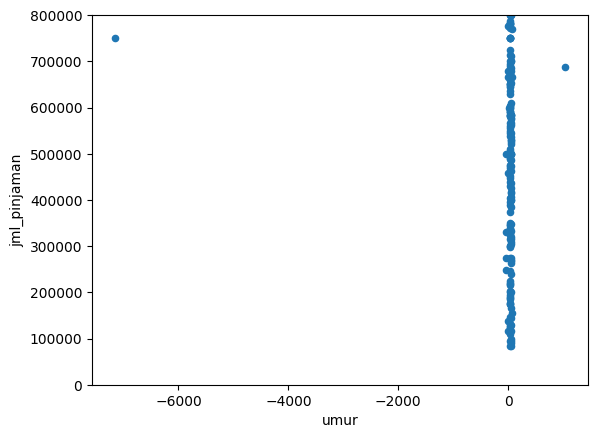

In [8]:
var = 'umur'
data = pd.concat([df_train['jml_pinjaman'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='jml_pinjaman', ylim=(0,800000));

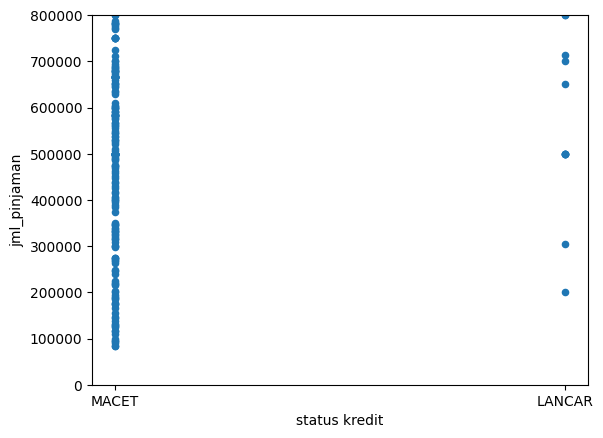

In [10]:
var = 'status kredit'
data = pd.concat([df_train['jml_pinjaman'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='jml_pinjaman', ylim=(0,800000));

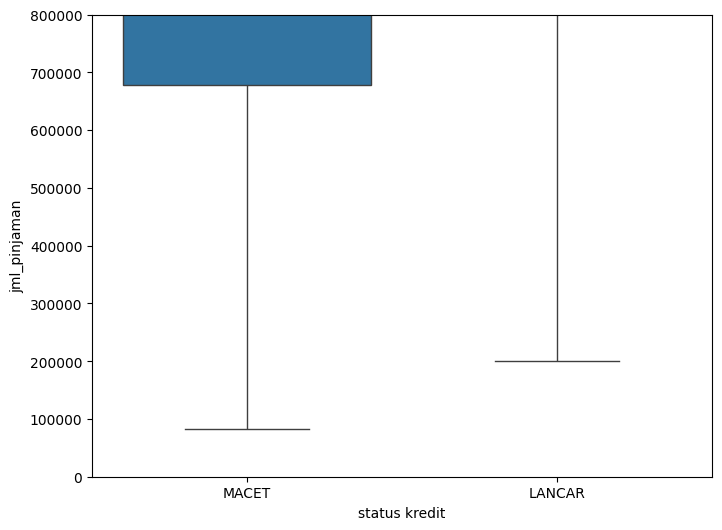

In [11]:
var = 'status kredit'
data = pd.concat([df_train['jml_pinjaman'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="jml_pinjaman", data=data)
fig.axis(ymin=0, ymax=800000);

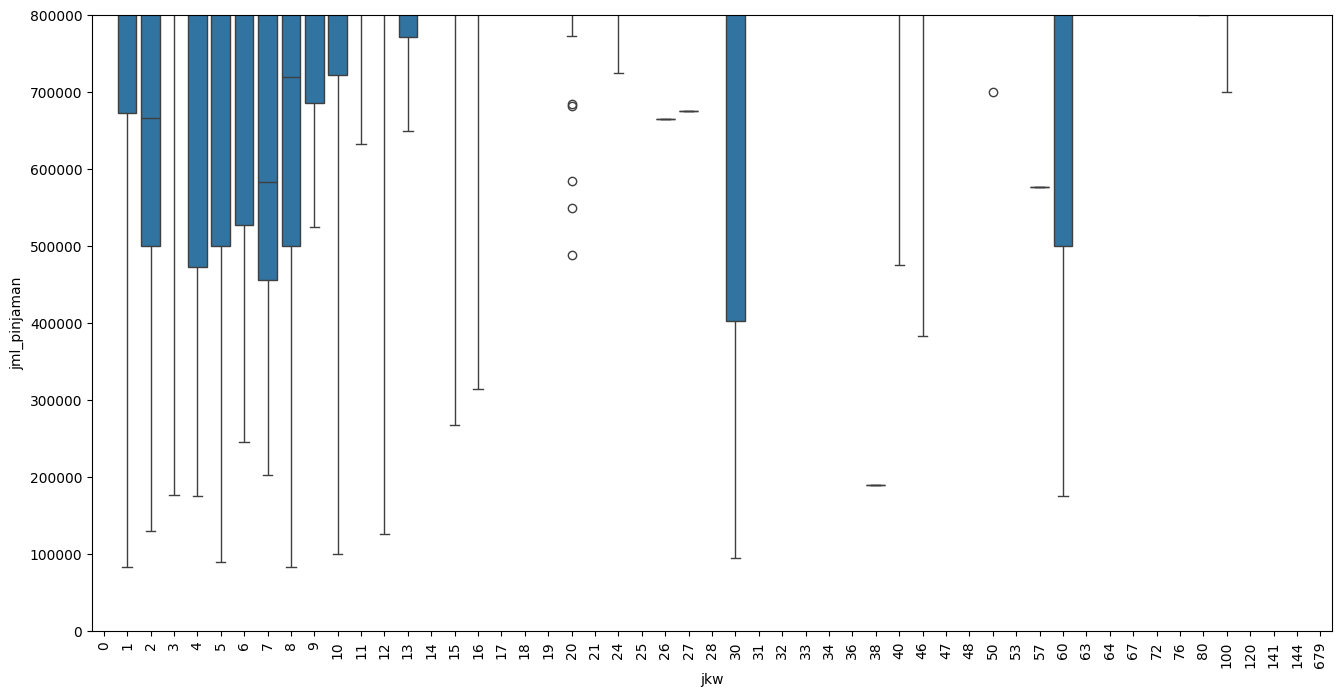

In [12]:
var = 'jkw'
data = pd.concat([df_train['jml_pinjaman'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="jml_pinjaman", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

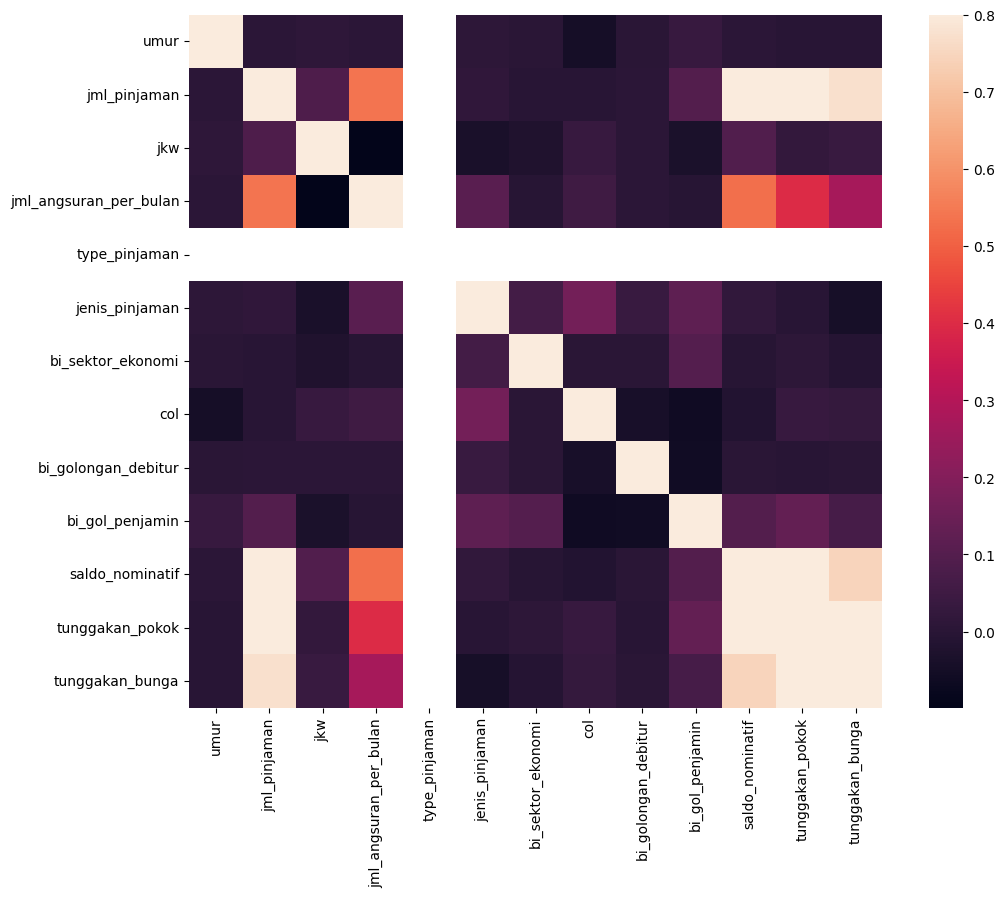

In [13]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

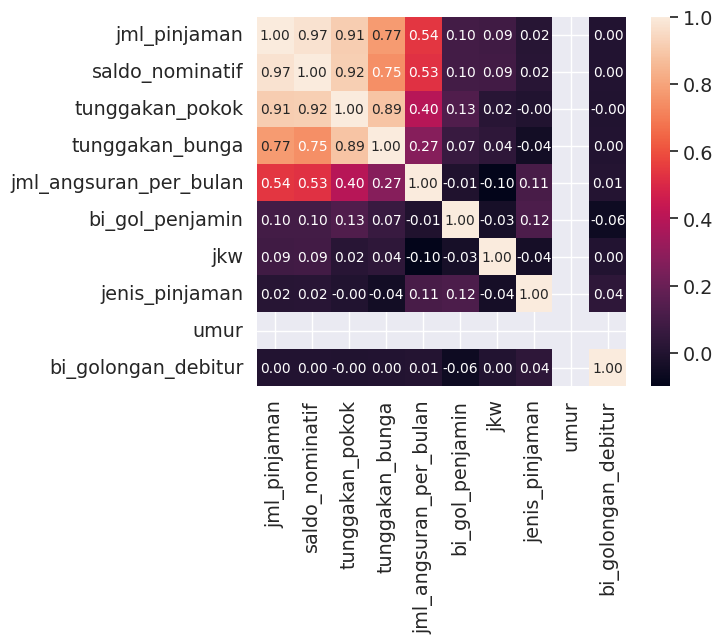

In [14]:
k = 10
cols = corrmat.nlargest(k, 'jml_pinjaman')['jml_pinjaman'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

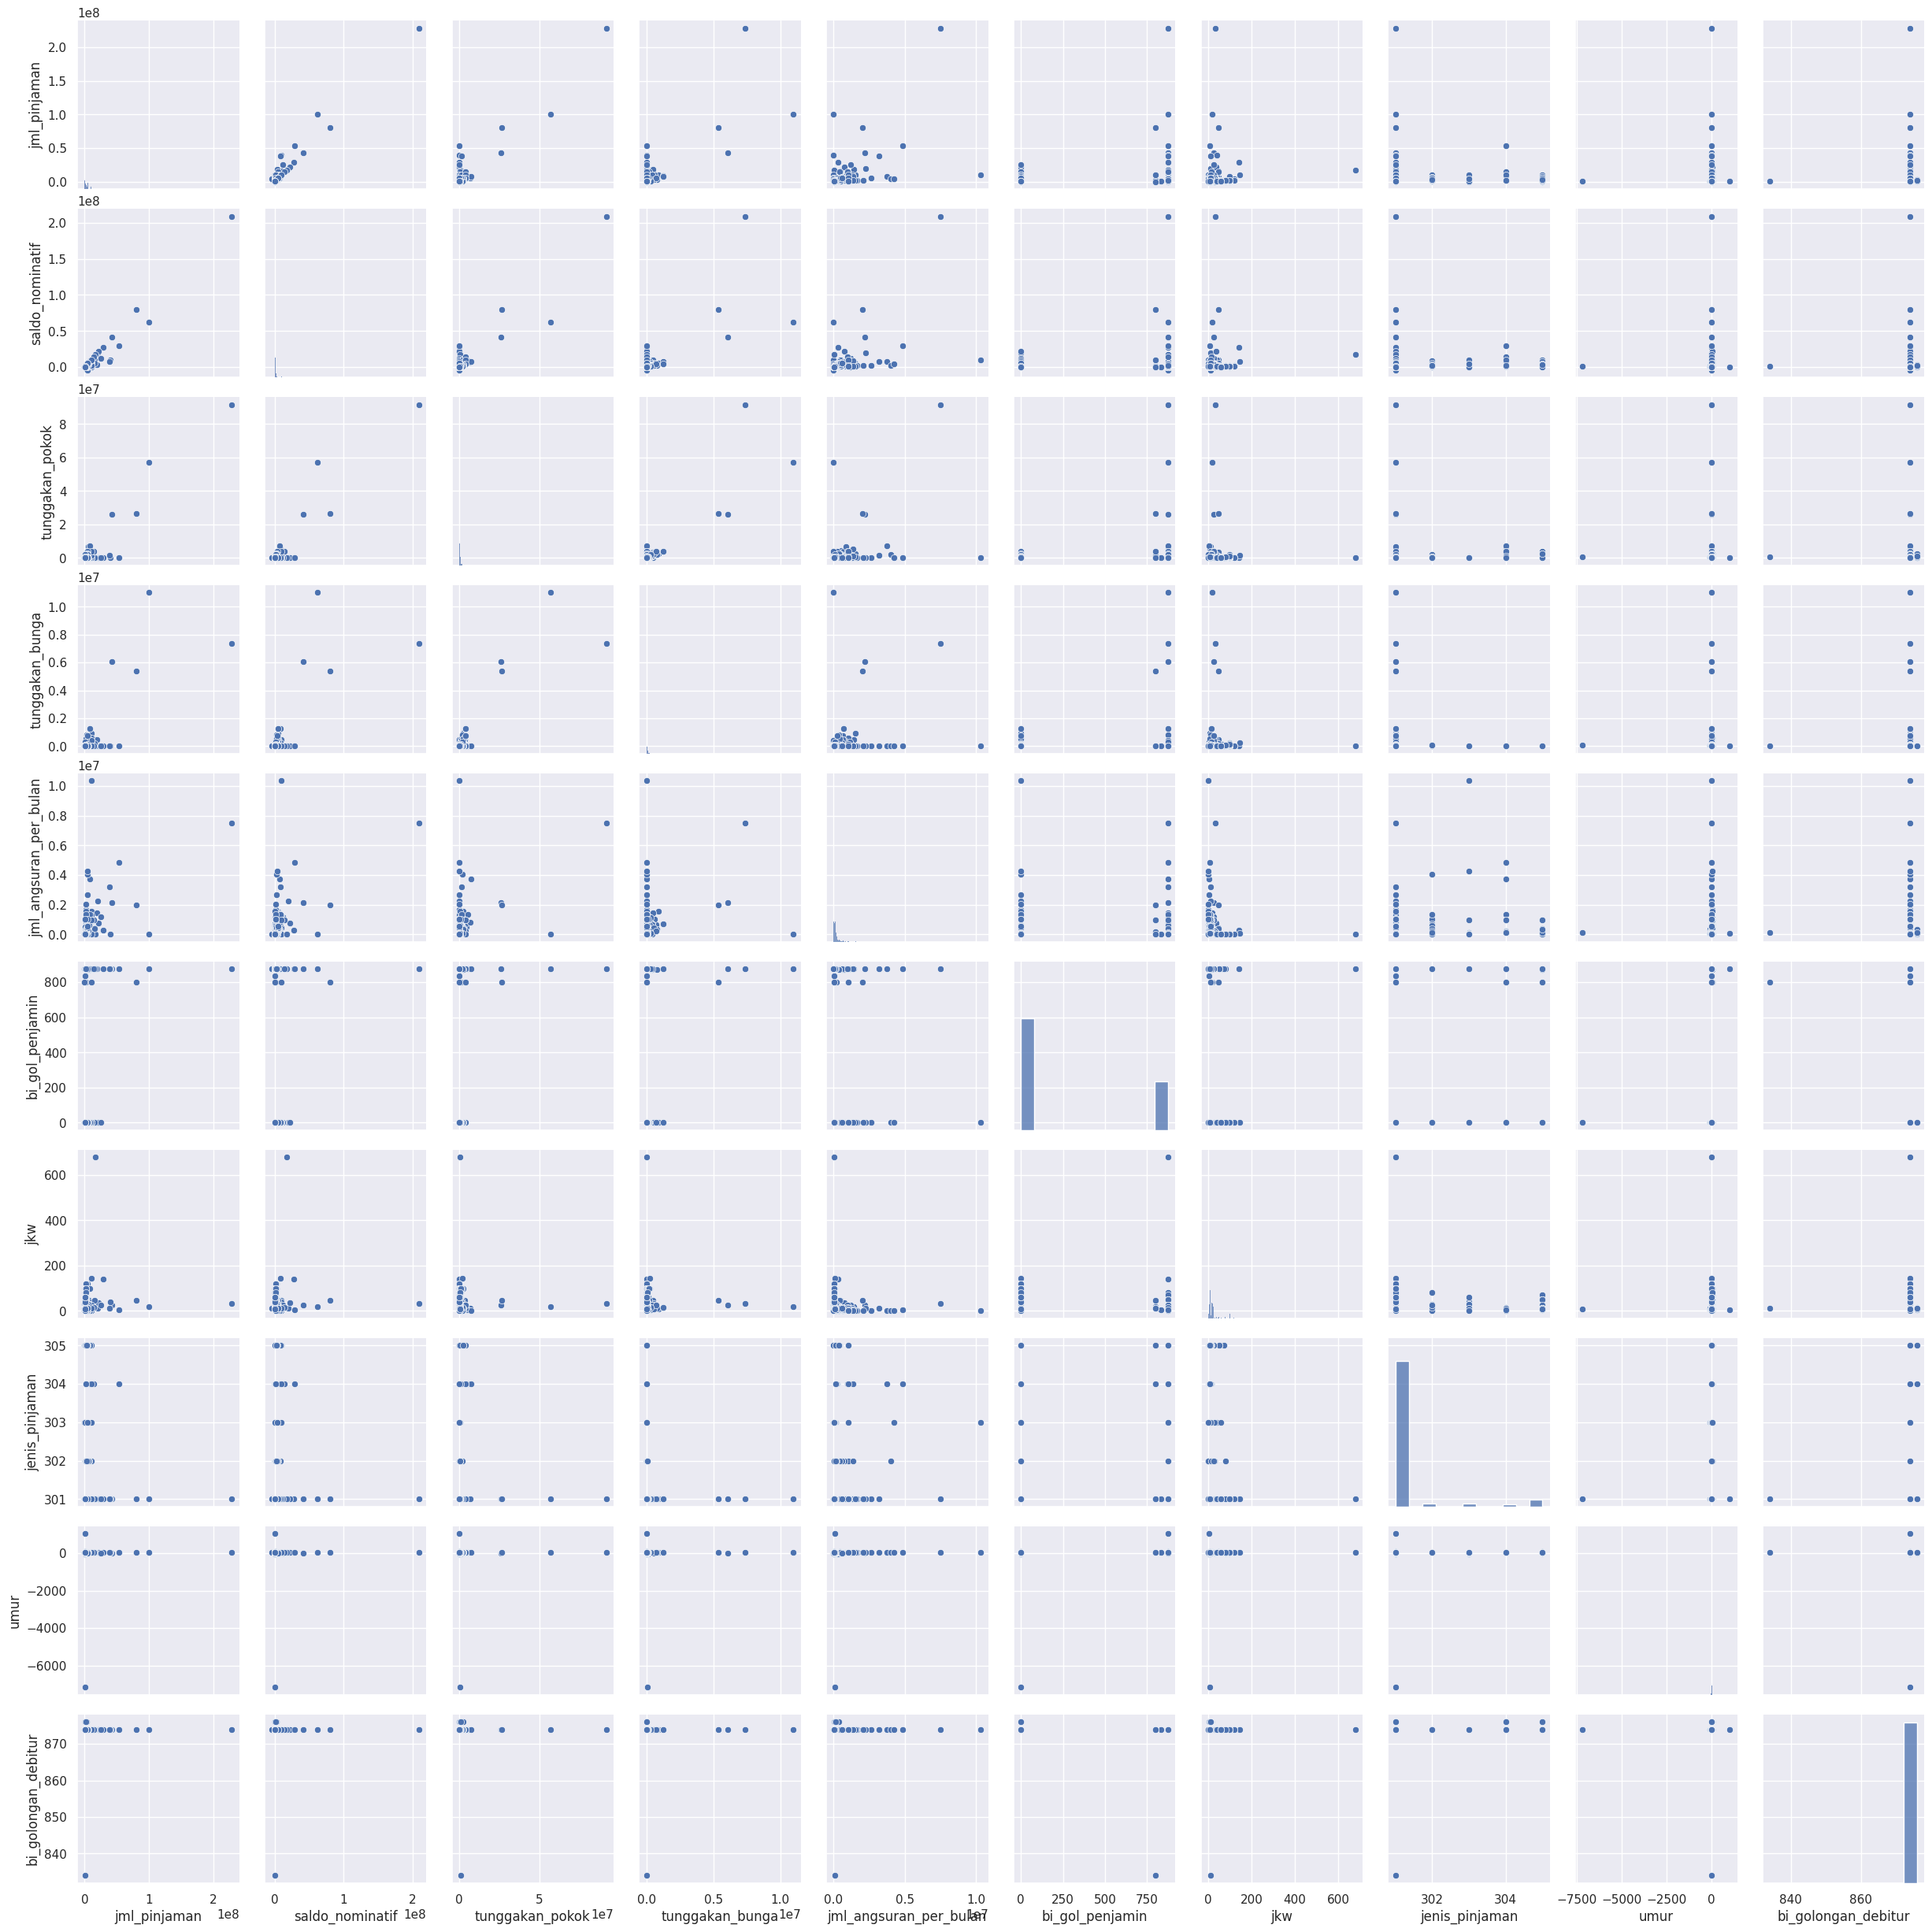

In [16]:
sns.set()
cols = ['jml_pinjaman', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga', 'jml_angsuran_per_bulan', 'bi_gol_penjamin', 'jkw', 'jenis_pinjaman', 'umur', 'bi_golongan_debitur']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

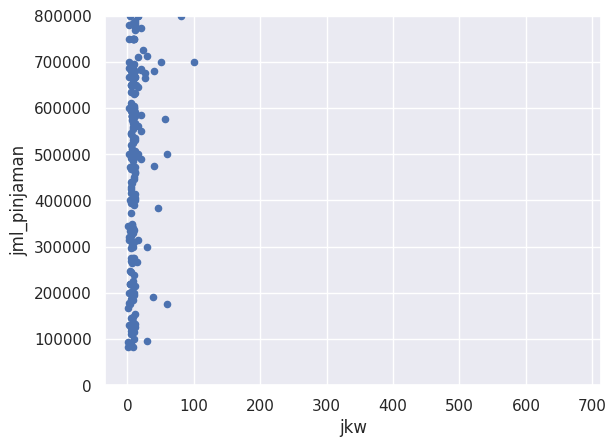

In [17]:
var = 'jkw'
data = pd.concat([df_train['jml_pinjaman'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='jml_pinjaman', ylim=(0,800000));